***11.5 Exploratory Data Analysis***

Employee Attrition Analysis

Context
The key to success in any organization is attracting and retaining top talent. I teach HR courses and I want to explore why employees leave. The data generated by IBM is a good example of this.

The dependent variable is Attrition, which is a "Yes/No" variable.
I will do exloratory data analysis on the HR-Employee-Attrition.csv dataset, before running classification models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from ydata_profiling.utils.cache import cache_file


In [2]:
import statsmodels as sm
import scipy as sp

In [3]:
import math

In [4]:
Data_path= "/Users/shsu/Documents/GitHub/dsc/Unit 11 - Python Statistics in EDA/11.5 Exploratory Data Analysis/HR-Employee-Attrition.csv"
df = pd.read_csv(Data_path)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# I will drop the following columns: EmployeeCount, EmployeeNumber, Over18, StandardHours. These columns are not useful for analysis.
df=df.drop(["EmployeeCount", "EmployeeNumber","Over18","StandardHours"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [9]:
df.head() # Ordinal values have been replaced with actual categories.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
df.isnull().sum() #checking for null values. No null values.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
## The usual suspect of employee attrition is monthly income. Intuitively, one can say that people who are not happy with their pay are more likely to leave.
# I will make a scatterplot of MonthlyIncome vs TotalWorkingYears with Attrition being hue and see if there is any obvious pattern. 


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

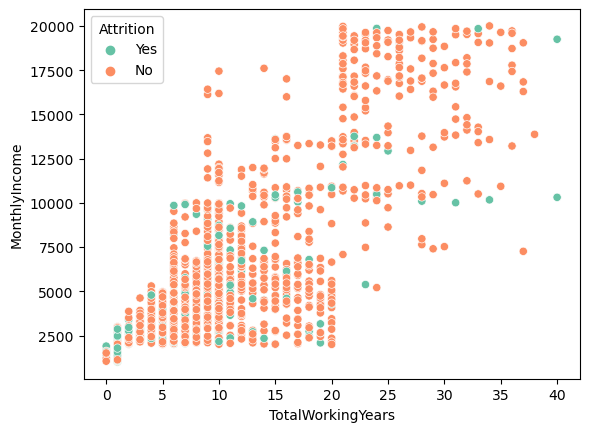

In [12]:
sns.scatterplot(y= "MonthlyIncome", x= "TotalWorkingYears" , data=df, hue="Attrition",palette="Set2") 

In [13]:
## It is difficult to spot an obvious patter in the scatterplot above. 
# Next, I will check the correlation between Attrition and MonthlyIncome.

In [14]:
# Point-Biserial Correlation between Attorition and MonthlyIncome
# I will run a point-biserial correlation test between Attrition and MonthlyIncome.
attrition=df.Attrition.replace({"Yes":1,"No":0})
sp.stats.pointbiserialr(attrition, df.MonthlyIncome)

PointbiserialrResult(correlation=-0.15983958238498874, pvalue=7.147363985353496e-10)

In [15]:
# No statististically significant correlation between Attrition and MonthlyIncome.

In [16]:
# Next, I will visualize the relationship between Attrition, MonthlyIncome, JobStaisfaction, EnvironmentalSatisfaction, and Gender. 

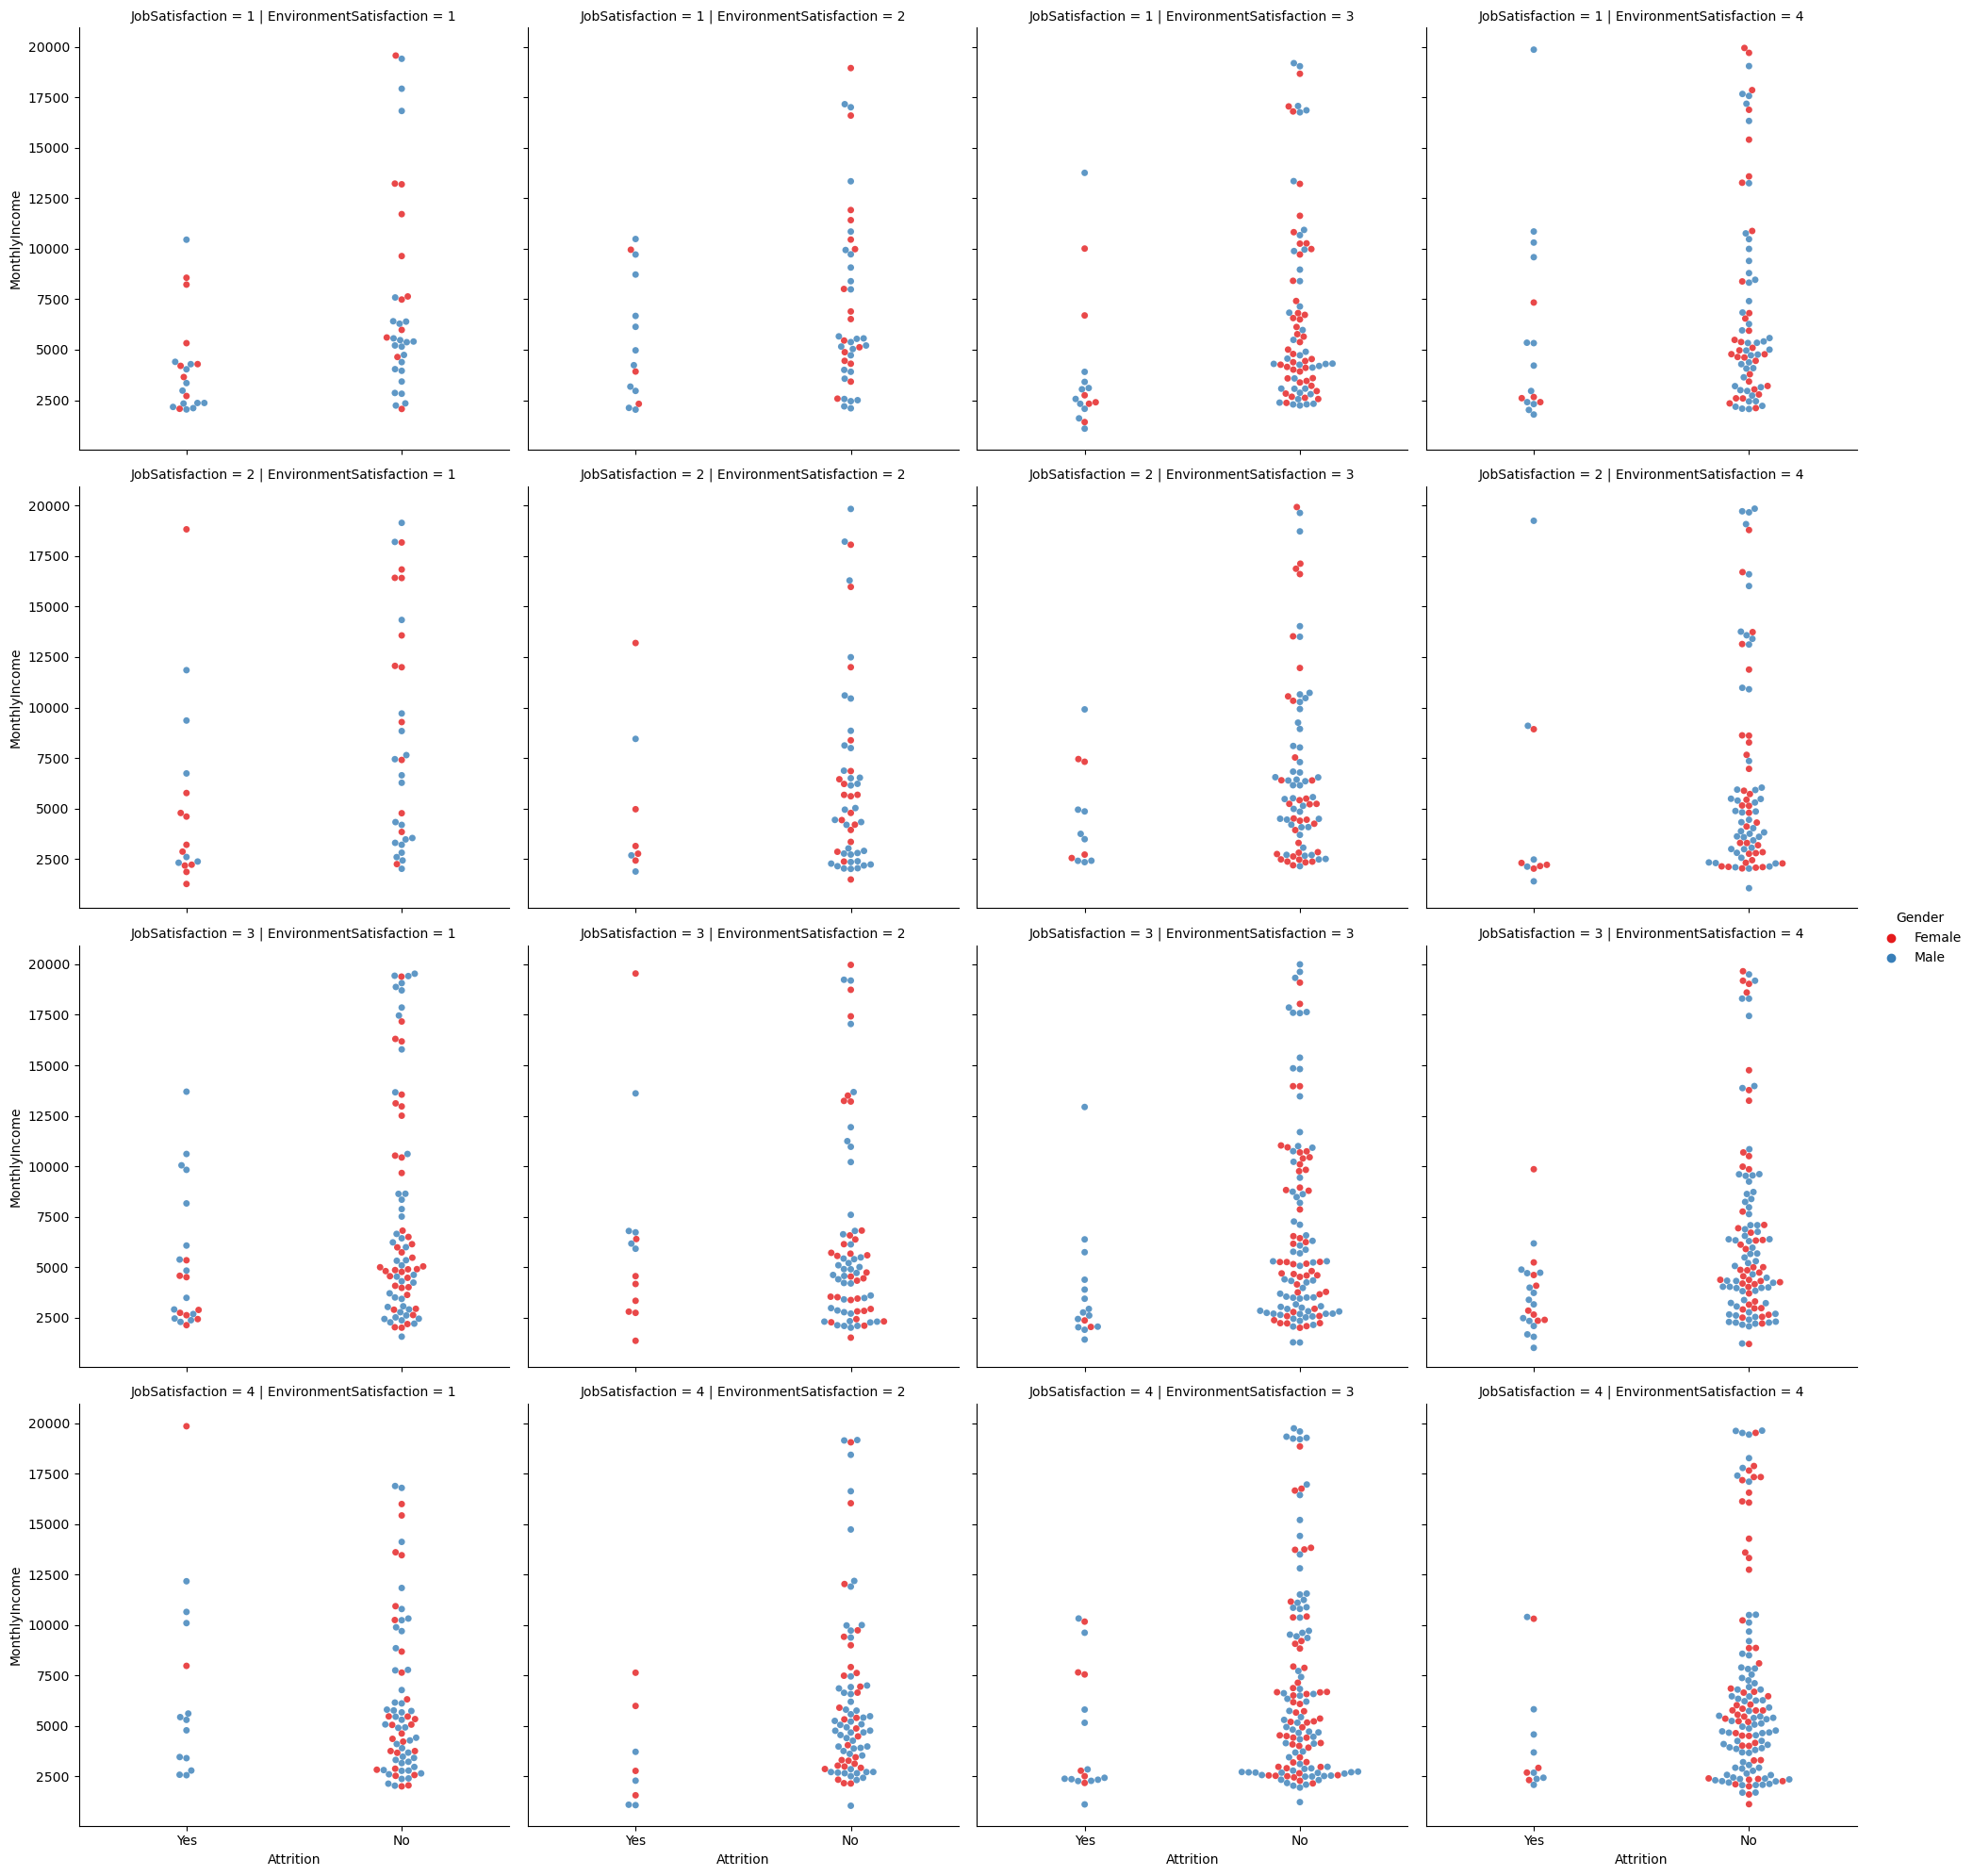

In [17]:
sns.catplot(y= "MonthlyIncome", x= "Attrition" , data=df, kind="swarm",hue="Gender", palette="Set1", row="JobSatisfaction", col = "EnvironmentSatisfaction",alpha=0.8)

In [18]:
# I cannot see an obvious pattern in the scatterplot above.
# I shall dive deeper into data visualization and associations.

In [19]:
# I will split the columns into integer and object columns.
df_int = df.select_dtypes(include=['int64']) # All the integer columns
df_obj= df.select_dtypes(include=['object']) # All the object columns

In [20]:
df_obj.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [21]:
# I will check correlations between categorical (i.e., object) variables.
# The information about correlation between categorical variables is available here: https://towardsdatascience.com/correlation-when-pearsons-r-is-not-enough-aded72308635

In [22]:
# I will do a correlation test between Attrition and Gender using Phi Coefficient. 
# Phi coefficient (a.k.a. mean square contingency coefficient), denoted by ɸ, is a measure of association
# between two binary or dichotomous variables. 
# It is also known as the Matthews Correlation Coefficient (MCC). 
# In machine learning, MCC is used as a measure of quality of binary or multiclass classifications.

# First, I will test the correlation manually, then I will use mcc.sklearn to get Matthew's Correlation Coefficient. 
table = pd.crosstab(df_obj.Attrition, df_obj.Gender) # Create a contingency table

In [23]:
# Extract the values from the table
n11 = table.iloc[0,0]
n10 = table.iloc[0,1]
n01 = table.iloc[1,0]
n00 = table.iloc[1,1]

In [24]:
# Calculate the phi coefficient
coef = (n11*n00 - n10*n01) / (math.sqrt((n11+n10)*(n11+n01)*(n00+n10)*(n00+n01)))

print(f"Phi Coefficient: {coef}")

Phi Coefficient: 0.029453253175141653


In [25]:
# A very low correlation between Gender and Attrition (Phi = 0.029)

In [26]:
from sklearn.metrics import matthews_corrcoef # I will use mcc.sklearn to calculate Matthew's Correlation Coefficient from now on, instead of manual calculation.

In [27]:
mcc=matthews_corrcoef(df_obj.Attrition, df_obj.Gender)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.0


In [28]:
# There is no meaningful correlation between Gender and Attrition. 
# Let's see if Attrition is correlated with other categorical variables using mcc.

In [29]:
mcc2= matthews_corrcoef(df_obj.Attrition, df_obj.MaritalStatus)
print(f"Matthews Correlation Coefficient: {mcc2}")

Matthews Correlation Coefficient: 0.0


In [30]:
# No meaningful correlation between MaritalStatus and Attrition. 

In [31]:
mcc2= matthews_corrcoef(df_obj.Attrition, df_obj.OverTime)
print(f"Matthews Correlation Coefficient: {mcc2}")

Matthews Correlation Coefficient: 0.2461179942458043


In [32]:
# Interesting, there is a weak correlation between OverTime and Attrition.

In [33]:
# I will explore other categorical variables using Cramer's V
# Cramer’s V (a.k.a. Cramer’s Phi and denoted by V) is a measure of association (or correlation) between two categorical (nominal) variables. 
# This is very similar to Phi Coefficient but it is more generalized in that it can be applied to n*n contingency tables
# (unlike ɸ, which can only be applied to binary variables).
# Cramer’s V is useful here because at least one of the variables is non-binary.

In [34]:
table2= pd.crosstab(df_obj.Attrition, df_obj.BusinessTravel) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table2)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table2.values.sum()*min(table2.shape[0]-1, table2.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.12825997643406717


In [35]:
# There is a  weak correlation between Travel Frequency and Attrition (v= 0.128)

In [36]:
table3= pd.crosstab(df_obj.Attrition, df_obj.Department) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table3)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table3.values.sum()*min(table3.shape[0]-1, table3.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.0856984402909795


In [37]:
# There is a very weak relationship between Department and Attrition (v= 0.085)

In [38]:
table4= pd.crosstab(df_obj.Attrition, df_obj.EducationField) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table4)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table4.values.sum()*min(table4.shape[0]-1, table4.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.10440851908182987


In [39]:
# There is a very weak relationship between EducationField and Attrition (v= 0.104)

In [40]:
table5= pd.crosstab(df_obj.Attrition, df_obj.JobRole) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table5)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table5.values.sum()*min(table5.shape[0]-1, table5.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.24214215996065436


In [41]:
# There is a weak association between JobRole and Attrition (v= 0.242)

In [42]:
df_int.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [43]:
## Further, I will subset the ordinal columns from the dataframe and analyze the correlation between them.

In [44]:
ord_cols=["Education","EnvironmentSatisfaction",
          "JobInvolvement","JobLevel", "JobSatisfaction","PerformanceRating",
          "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]

In [45]:
df_ord = df[ord_cols] # I seperate columns with ordinal values from columns with continuous values. 

In [46]:
# First, I will replace ordinal numeric values with ordinal categories for better visualization . 

col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df_ord['Education']:
    df_ord['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df_ord['PerformanceRating']:
    df_ord['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df_ord['WorkLifeBalance']:
    df_ord['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df_ord[col]:
    df_ord[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)

/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/2459754110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/2459754110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/2459754110.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [47]:
df_ord.head() # These are the columns with ordinal values

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,College,Medium,High,2,Very High,Excellent,Low,0,Bad
1,Below College,High,Medium,2,Medium,Outstanding,Very High,1,Better
2,College,Very High,Medium,1,High,Excellent,Medium,0,Better
3,Master,Very High,High,1,High,Excellent,High,0,Better
4,Below College,Low,High,1,Medium,Excellent,Very High,1,Better


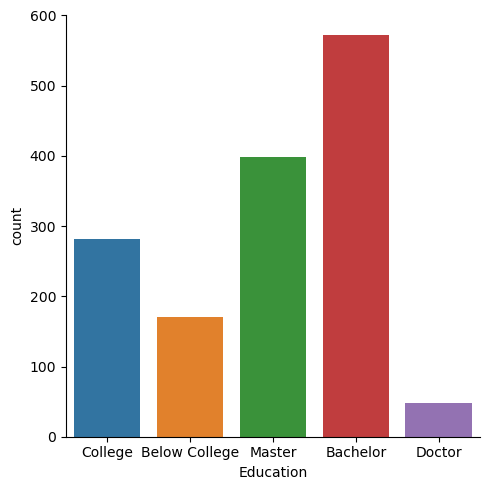

In [48]:
sns.catplot(y= None, x= "Education", data= df_ord, kind = "count")

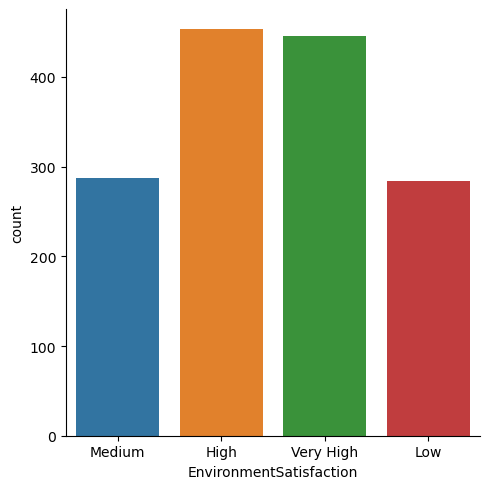

In [49]:
sns.catplot(y= None, x= "EnvironmentSatisfaction", data= df_ord, kind = "count")

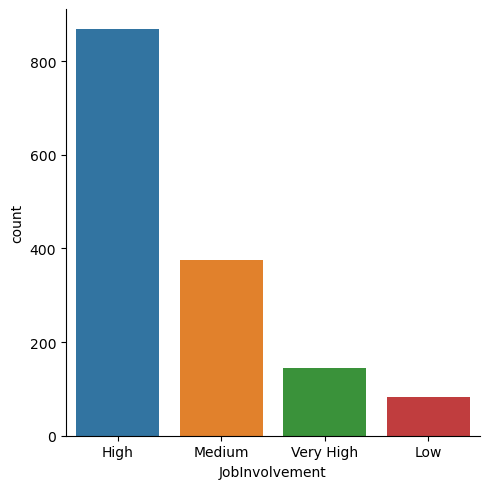

In [50]:
sns.catplot(y= None, x= "JobInvolvement", data= df_ord, kind = "count")

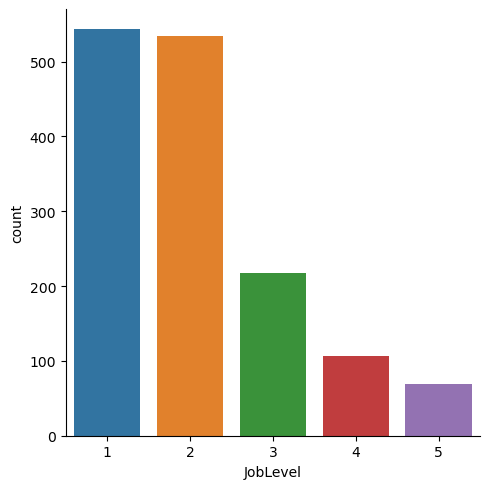

In [51]:
sns.catplot(y= None, x= "JobLevel", data= df_ord, kind = "count")

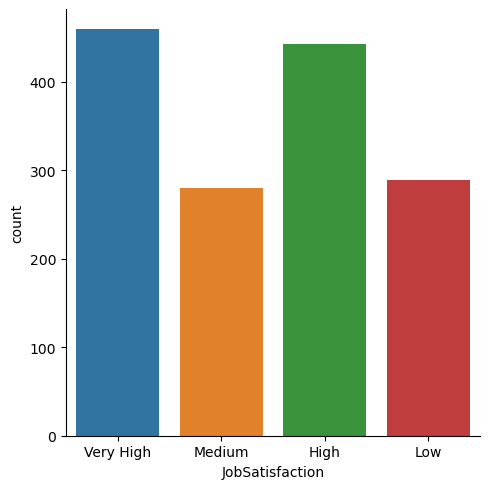

In [52]:
sns.catplot(y= None, x= "JobSatisfaction", data= df_ord, kind = "count")

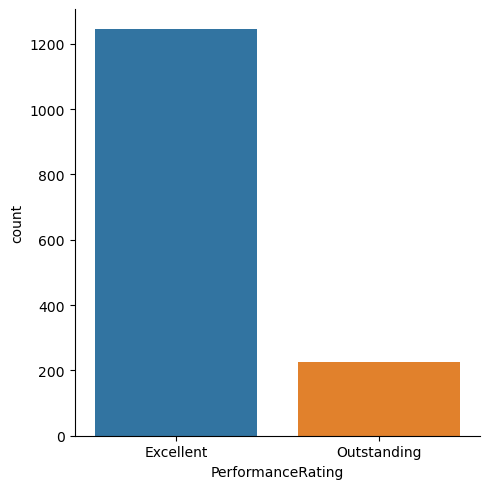

In [53]:
sns.catplot(y= None, x= "PerformanceRating", data= df_ord, kind = "count")

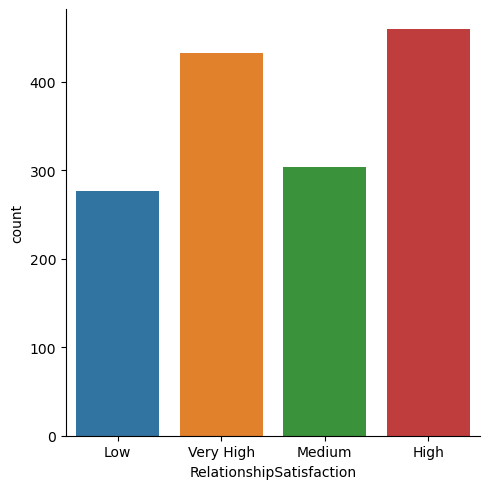

In [54]:
sns.catplot(y= None, x= "RelationshipSatisfaction", data= df_ord, kind = "count")

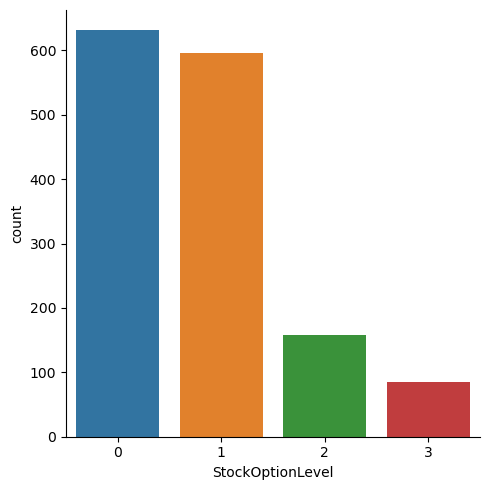

In [55]:
sns.catplot(y= None, x= "StockOptionLevel", data= df_ord, kind = "count")

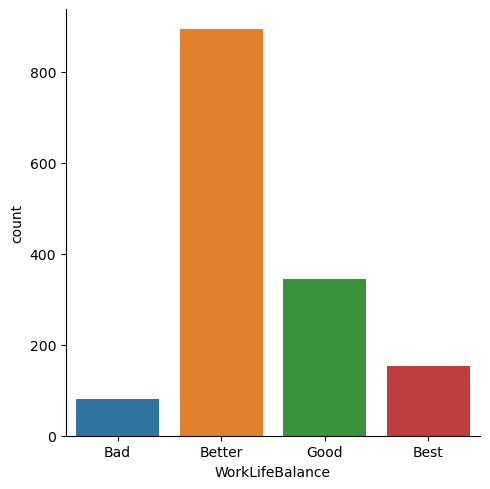

In [56]:
sns.catplot(y= None, x= "WorkLifeBalance", data= df_ord, kind = "count")

In [57]:
# Next, I will check correlations between ordinal variables. 
# Before doing this I will convert ordinal categories to their ordinal numeric representation.
# I am basically undoing what I did above. 

In [58]:
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df_ord['Education']:
    df_ord['Education'].replace({'Below College':1,'College':2,'Bachelor':3,'Master':4, 'Doctor':5},
                       inplace = True)
    
for i in df_ord['PerformanceRating']:
    df_ord['PerformanceRating'].replace({'Low':1,'Good':2 ,'Excellent':3,'Outstanding': 4},
                                  inplace = True)
    
for i in df_ord['WorkLifeBalance']:
    df_ord['WorkLifeBalance'].replace({'Bad':1 ,'Good':2, 'Better': 3, 'Best': 4}, 
                                  inplace = True)

for i in df_ord[col]:
    df_ord[i].replace({'Low':1, 'Medium': 2,'High':3,'Very High':4},
                   inplace = True)

/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/1539840198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['Education'].replace({'Below College':1,'College':2,'Bachelor':3,'Master':4, 'Doctor':5},
/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/1539840198.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['PerformanceRating'].replace({'Low':1,'Good':2 ,'Excellent':3,'Outstanding': 4},
/var/folders/k8/r_bp9_b934316xfxzqhf0mc00000gp/T/ipykernel_3321/1539840198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [59]:
df_ord.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2,2,3,2,4,3,1,0,1
1,1,3,2,2,2,4,4,1,3
2,2,4,2,1,3,3,2,0,3
3,4,4,3,1,3,3,3,0,3
4,1,1,3,1,2,3,4,1,3


In [60]:
corr_ord=df_ord.corr(method="kendall") # Correlation matrix with Kendall's tau for ordinal columns
# I used kendall's tau to calculate the correlation between ordinal variables. 
# https://towardsdatascience.com/correlation-when-pearsons-r-is-not-enough-aded72308635 

<AxesSubplot:>

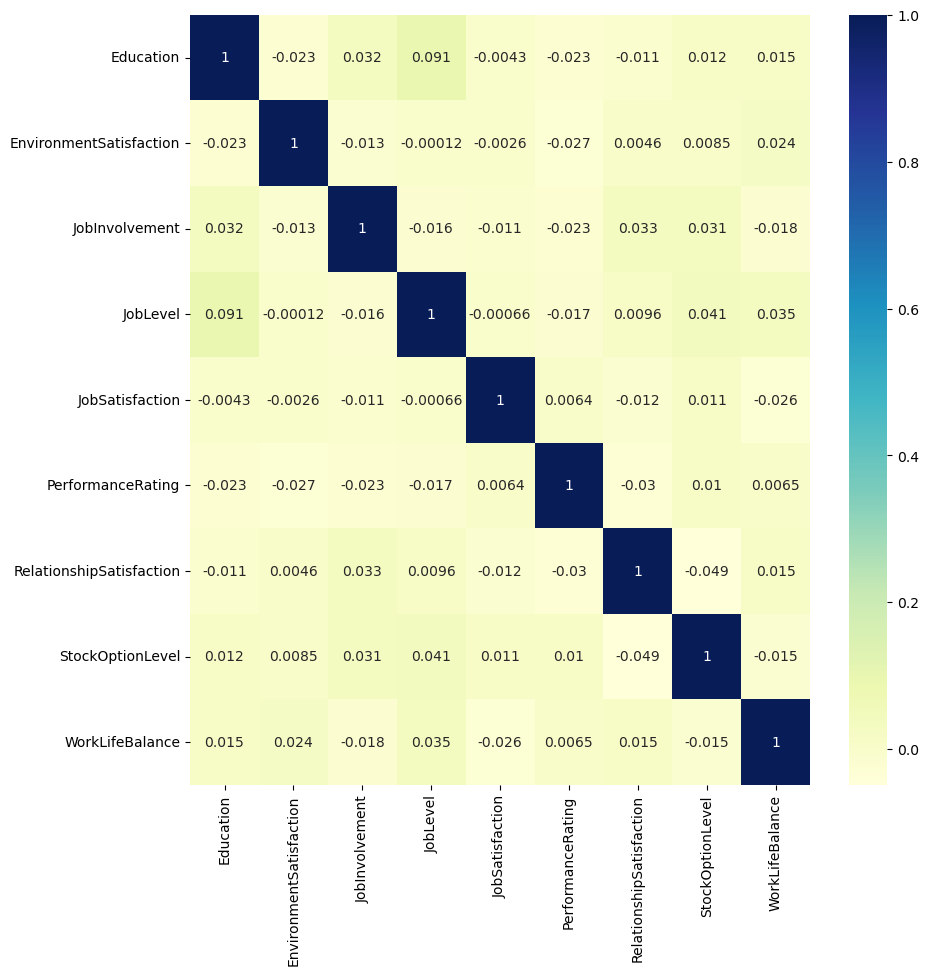

In [61]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_ord,cmap="YlGnBu", annot=True) # Heatmap of correlation matrix for Kendall's tau

In [62]:
# Very low correlation between ordinal variables. Nothing meaningful. 

In [63]:
df_num=df.drop(ord_cols, axis=1) # I seperate columns with continuous values and call them df_num


In [64]:
obj_cols=df_obj.columns
print(obj_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [65]:
df_num = df_num.drop(obj_cols, axis=1)
df_num.head() # These are the columns with continuous values

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsInCurrentRole'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

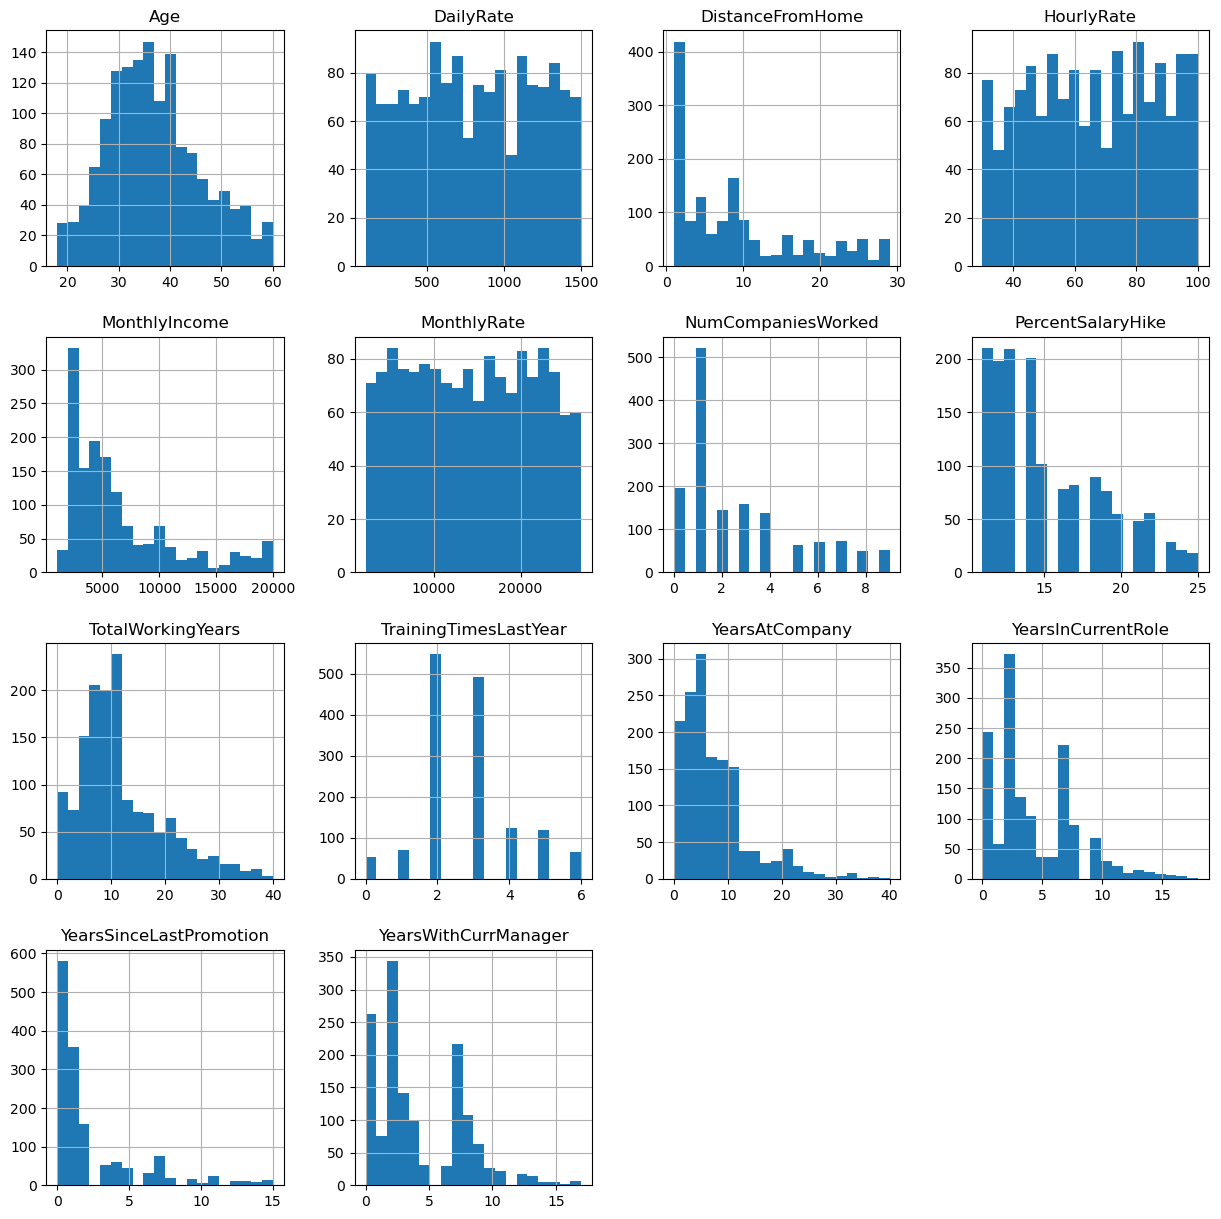

In [66]:
df_num.hist(bins=20, figsize=(15, 15)) #visualize distributions

In [67]:
# Next, I will check correlations between continuous variables.

<AxesSubplot:>

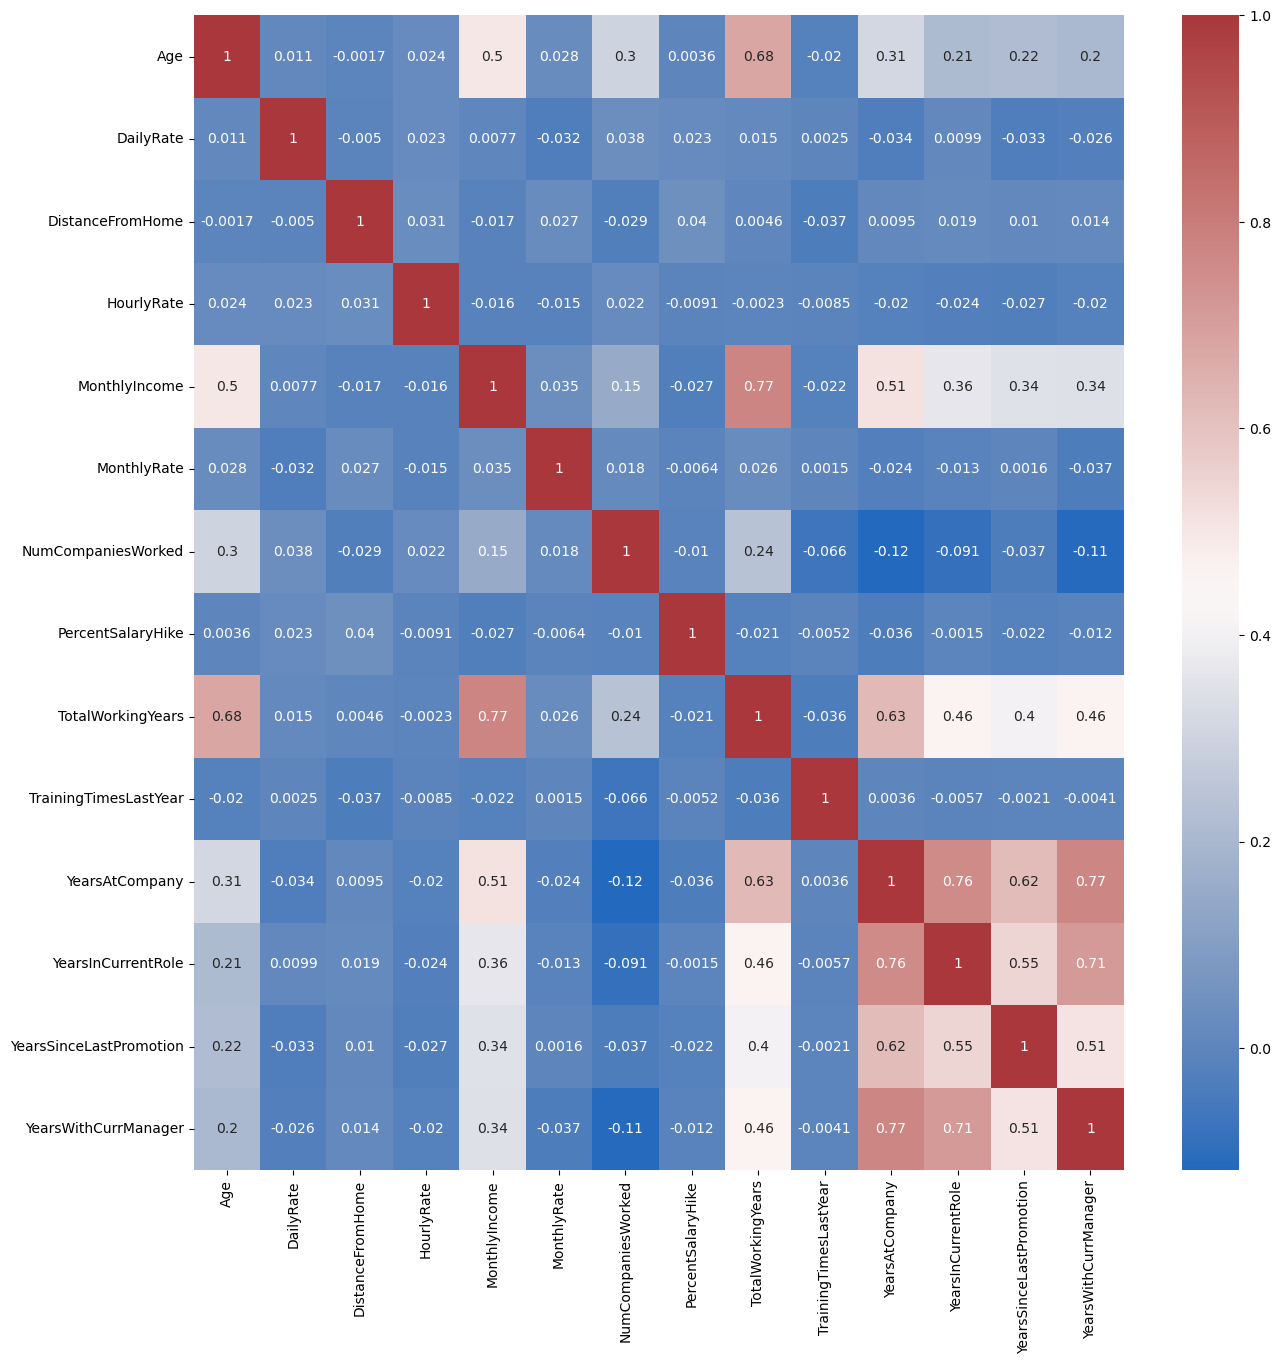

In [68]:
corr_num=df_num.corr(method="pearson")
plt.figure(figsize=(15, 15))
sns.heatmap(corr_num, cmap="vlag", annot=True) # Heatmap of correlation matrix for Pearson's r

In [69]:
# There are a few columns that are relatively highly correlated. 
# TotalWorkingYears is correlated with Age (r= .68) and MonthlyIncome (r=.77).
# YearsAtCompany is correlated with TotalWorkingYears (r= .63), YearsWithCurrManager (r= .77), YearsSinceLastPromotion (r= .62), and YearsinCurrentRole (r= .76).
# YearsInCurrentRole is correlated with YearsWithCurrManager (r= .71), YearsSinceLastPromotion (r= .55).


In [70]:
# Next, I will do dimension reduction. 
# See https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1 for information for dimensionality redution via Prince.
#First, I need to import prince package. 

In [71]:
import prince

In [72]:
# I will run three rounds of dimension reduction.
# 1. MCA with ordinal variables
# 2. PCA with numerice variables
# 3. FAMD with all variables
# Source for documentation: https://maxhalford.github.io/prince/pca/


In [73]:
# 1- MCA with Ordinal variables
mca = prince.MCA(
    n_components=6, ## I tested multiple components. I chose 6 components. TBH, 4 of 5 components could be used too. 
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df_ord)

In [74]:
mca.eigenvalues_summary # Eigenvalues show the amount of variance explained by each component. The first two components explain almost 44% of variance.
# The first five components explain most of the variance (83.56%).
# The sixth component is not very useful. It explains only 8% of variance. 

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.039,27.03%,27.03%
1,0.024,16.88%,43.91%
2,0.020,14.20%,58.11%
3,0.020,13.55%,71.66%
4,0.017,11.91%,83.56%
5,0.012,8.00%,91.56%


In [75]:
mca.column_coordinates(df_ord)

,0,1,2,3,4,5
Education,-0.030845,0.047734,0.011295,0.028317,-0.287392,-0.139719
EnvironmentSatisfaction,-0.038553,-0.116281,-0.208958,-0.265425,0.078437,-0.079845
JobInvolvement,-0.023058,-0.035198,-0.009088,0.022476,-0.056437,0.153818
JobLevel,-0.039770,0.463673,0.012010,-0.042441,0.125459,-0.016630
JobSatisfaction,-0.033494,-0.117772,0.333346,-0.061036,0.103800,-0.064019
PerformanceRating,-0.023674,-0.024674,0.003228,0.001755,-0.025994,0.066391
RelationshipSatisfaction,-0.084358,-0.081439,-0.118927,0.291353,0.140879,-0.085993
StockOptionLevel,1.029689,-0.006192,-0.022396,0.041542,0.032092,-0.023862
WorkLifeBalance,-0.029981,-0.021187,-0.015770,0.001444,-0.032606,0.165217


In [76]:
mca.plot(
    df_ord,
    x_component=0,
    y_component=1
)

alt.Chart(...)

In [77]:
## The graph above shows how much each column stands out for the first two components. StockOptionLevel stands out for component 0.
# While JobLevel stands out for component 1.

In [78]:
mca.plot(
    df_ord,
    x_component=2,
    y_component=3
)

alt.Chart(...)

In [79]:
## The graph above shows how much each column stands out for the components 2 and 3. JobSatisfaction stands out for component 2.
# While RelationshipSatisfaction stands out for component 3.
# EnvironmentSatisfaction contributes to variation in both components, though its contribution is relatively low and 
# it appears in the negative coordiantes for both components.
# Other columns appear to cluster aroud the center.

In [80]:
mca.plot(
    df_ord,
    x_component=4,
    y_component=5
)

alt.Chart(...)

In [81]:
# Education stands out for component 4 although it is in the negative coordinates.
# 

In [82]:
mca.column_contributions_.style.format('{:.0%}') # Percentage of variance explained by each component. 


,0,1,2,3,4,5
Education,0%,1%,0%,1%,62%,22%
EnvironmentSatisfaction,0%,7%,26%,43%,4%,7%
JobInvolvement,0%,1%,0%,0%,2%,25%
JobLevel,0%,81%,0%,1%,8%,0%
JobSatisfaction,0%,7%,66%,2%,8%,4%
PerformanceRating,0%,0%,0%,0%,1%,5%
RelationshipSatisfaction,2%,3%,8%,52%,14%,8%
StockOptionLevel,96%,0%,0%,0%,0%,0%
WorkLifeBalance,0%,0%,0%,0%,1%,29%


In [83]:
# I don't see a lot of columns sticking together in specific components. StockOptionLevel is the only one that contributes to component 0. 
# JobLEvel is the only one that contributes to component 1.
# JobSatisfaction and EnvironmentSatisfaction are the only ones that contribute to component 2.
# EnvironmentSatisfaction and RelationshipSatisfaction are the only ones that contribute to component 3.
# Education and RelationshipSatisfaction are the only ones that contribute to component 4.
# Education, JobInvolvement, and WorklifeBalance are the only ones that contribute to component 5.

In [ ]:
### Next I will do PCA with numerical variables

In [84]:
pca = prince.PCA(
    n_components=3, # I set the number of components to 3
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df_num)

In [85]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.017,28.69%,28.69%
1,1.650,11.79%,40.48%
2,1.069,7.63%,48.11%


In [ ]:
# The first two components explain more than 40% of variance. The third component does not explain much.

In [86]:
pca.scree_plot()

alt.Chart(...)

In [87]:
pca.column_coordinates_ # Coordinates for each component

component,0,1,2
variable,,,
Age,0.561489,0.606556,-0.003378
DailyRate,-0.013659,0.100151,0.214290
DistanceFromHome,0.009644,-0.053394,0.687271
HourlyRate,-0.022624,0.080504,0.364020
MonthlyIncome,0.722757,0.373050,-0.054028
MonthlyRate,0.002251,0.110679,-0.021040
NumCompaniesWorked,0.062114,0.719550,-0.005788
PercentSalaryHike,-0.030767,-0.005933,0.481548
TotalWorkingYears,0.832310,0.408640,-0.009943


In [88]:
pca.plot(
    df_int,
    x_component=0,
    y_component=1,
    
    show_rows=True,
    show_columns=True
)

alt.LayerChart(...)

In [89]:
pca.column_contributions_.style.format('{:.0%}') # No colunmn really stands out

component,0,1,2
variable,,,
Age,8%,22%,0%
DailyRate,0%,1%,4%
DistanceFromHome,0%,0%,44%
HourlyRate,0%,0%,12%
MonthlyIncome,13%,8%,0%
MonthlyRate,0%,1%,0%
NumCompaniesWorked,0%,31%,0%
PercentSalaryHike,0%,0%,22%
TotalWorkingYears,17%,10%,0%


In [ ]:
# YearsAtCompany, YearsWithCurrManager, YearsSinceLastPromotion, and YearsinCurrentRole, TotalWorkingYears, and MonthlyIncome contribute to component 0.
# Age, NumCompaniesWored, and TotalWorkingYears contribute to component 1.
# DistanceFromHome, PercentSalaryHike, TrainingTimesLastYear, and HourIncome contribute to component 2.

In [90]:
pca.column_correlations

component,0,1,2
variable,,,
Age,0.561489,0.606556,-0.003378
DailyRate,-0.013659,0.100151,0.214290
DistanceFromHome,0.009644,-0.053394,0.687271
HourlyRate,-0.022624,0.080504,0.364020
MonthlyIncome,0.722757,0.373050,-0.054028
MonthlyRate,0.002251,0.110679,-0.021040
NumCompaniesWorked,0.062114,0.719550,-0.005788
PercentSalaryHike,-0.030767,-0.005933,0.481548
TotalWorkingYears,0.832310,0.408640,-0.009943


In [ ]:
# Finally, I will run a Factor Analysis of Mixed Data (FAMD) 

In [91]:
famd = prince.FAMD(n_components = 3, n_iter = 3, copy=True,
    check_input=True, random_state = 42, engine="sklearn",
    handle_unknown="error")
famd = famd.fit(df)

/Users/shsu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [92]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,9.792,8.82%,8.82%
1,9.514,8.57%,17.39%
2,8.101,7.30%,24.69%


In [ ]:
# Not much variance explained is explained by any components. 

In [93]:
famd.plot(df, x_component = 0, y_component = 1)

alt.LayerChart(...)

In [94]:
famd.column_contributions_.style.format('{:.0%}')

component,0,1,2
variable,,,
Age,0%,0%,4%
DailyRate,0%,0%,0%
DistanceFromHome,0%,0%,0%
Education,0%,0%,0%
EnvironmentSatisfaction,0%,0%,0%
HourlyRate,0%,0%,0%
JobInvolvement,0%,0%,0%
JobLevel,0%,0%,9%
JobSatisfaction,0%,0%,0%


In [ ]:
# As the table above shows, no column really makes a significant contribution to any component. 

In [ ]:
# Conclusion: 
# I did not see significant correlations or obvious patterns in the data
# Dimensionality reduction doesn not seem very possible with FAMD. PCA and MCA provide some evidence regarding existence of meaningful dimensions, 
# but there is no major dimension that explains a significant percentage of variance.
# I recommend not eliminating any of the columns as a result of dimensionality reduction algoritms. 
# The next step would be developing classification models for predicting attrition. 